# K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1. Import file "Mall_Customers.csv"\
 The spending score refers to how much a customer buys.
 https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Make a description of the table and analyze the values

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3. Check if there is missing data

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

4. Make a histogram of the 3 numerical variables

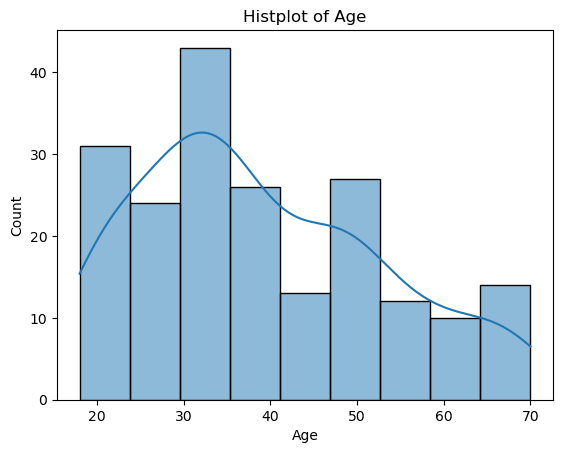

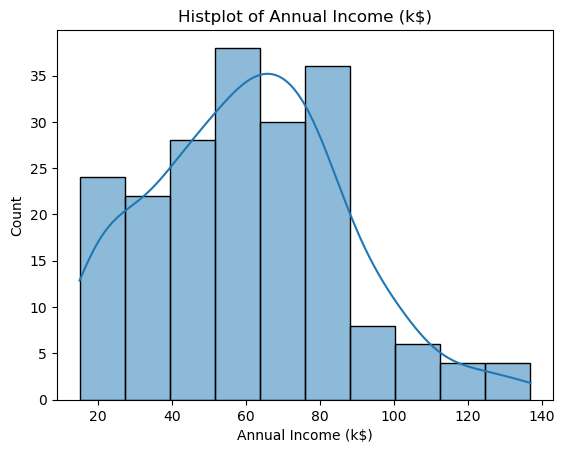

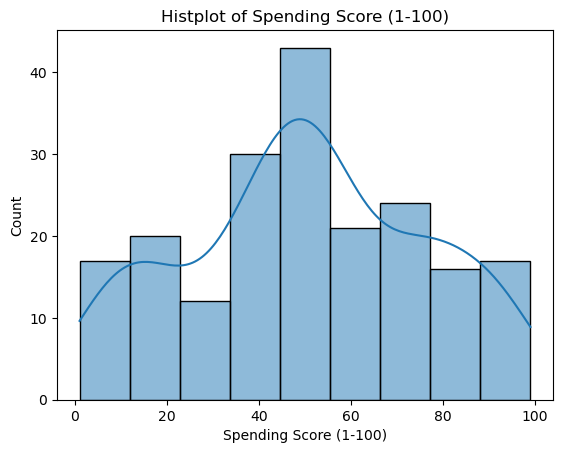

In [5]:
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    sns.histplot(df[x], kde = True)
    plt.title(f'Histplot of {x}')
    plt.show()

5. Make a bar graph showing the number of men and women

<Axes: xlabel='Gender', ylabel='count'>

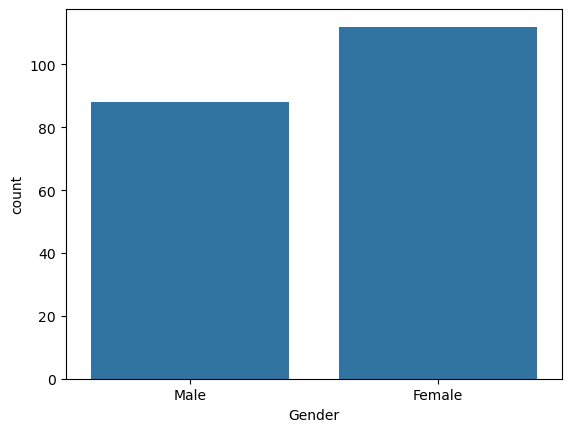

In [6]:
sns.countplot(x = 'Gender' , data = df)


6. Analyze correlation between the 3 numerical columns.\
 In clustering it is a bad thing that two columns are highly correlated, do you think it would be correct to use all of them?

In [7]:
df.iloc[:,2:5].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


7. Normalize the table data (with numerical values).

In [50]:
df_integer = df.iloc[:,2:]
df_norm = (df_integer-df_integer.min())/(df_integer.max()-df_integer.min())
df_norm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


8. Perform clustering with the Age and Annual Income columns (k$)
 * Analyze the optimal cluster number with the elbow method
 * Add column with cluster to dataset copy
 * Graph the clusters
 * Calculate silhouette

In [109]:
data = df_norm.loc[: , ['Age','Annual Income (k$)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [110]:
suma_error

[[1, 23.5839061503636],
 [2, 13.028938428018288],
 [3, 7.492113413237458],
 [4, 6.055858644812545],
 [5, 4.713025598595381],
 [6, 3.857270024358179],
 [7, 3.058061107078988],
 [8, 2.6531812401331285],
 [9, 2.3135720353543285],
 [10, 2.0586457194753005]]

In [ ]:
sns.lineplot(
    x = range(1, len(acum) + 1),
    y = acum
)

<Axes: xlabel='clusters', ylabel='Error'>

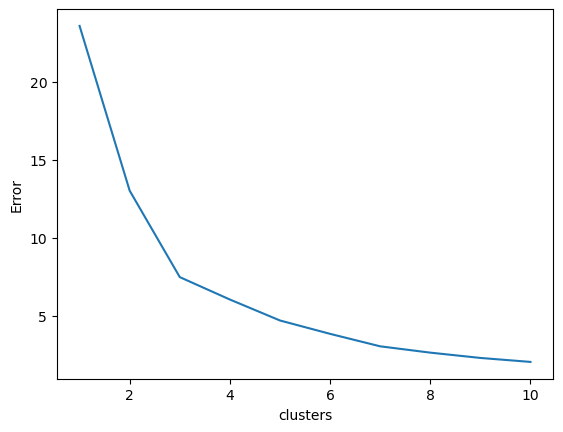

In [111]:
tabla_codo = pd.DataFrame(
    suma_error,columns=["clusters", "Error"]
)
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [112]:
modelo = KMeans(
    n_clusters = 3,
    n_init = 10,
    max_iter=3000,
    random_state = 1
)
modelo.fit(data)
df1 = df.copy()
df1["Cluster"] = modelo.labels_

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

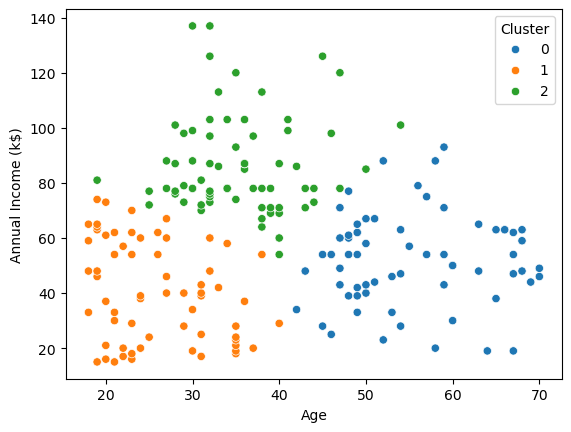

In [113]:
sns.scatterplot(
    data = df1,
    x = "Age", 
    y = "Annual Income (k$)", 
    hue = "Cluster",
    palette = "tab10"
)

In [114]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
data = df_norm.loc[: , ['Age','Annual Income (k$)']]

silhouette_kmeans = silhouette_score(data, df1["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.44048063969161466


In [108]:
df1.iloc[:,2:].groupby("Cluster").agg(["mean","count", "max", "min"])

Age               Annual Income (k$)                 \
              mean count max min               mean count  max min   
Cluster                                                              
0        55.415385    65  70  42          51.923077    65   93  19   
1        25.937500    64  40  18          40.640625    64   74  15   
2        35.323944    71  54  19          86.422535    71  137  54   

        Spending Score (1-100)                
                          mean count max min  
Cluster                                       
0                    38.861538    65  60   3  
1                    55.578125    64  99   5  
2                    55.732394    71  97   1

9. Perform clustering with the Annual Income (k$) and Spending Score (1-100) columns
 * Analyze the optimal cluster number with the elbow method
 * Add column with cluster to dataset copy
 * Graph the clusters
 * Calculate silhouette

In [115]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [116]:
suma_error

[[1, 23.04072032603991],
 [2, 13.993505283127977],
 [3, 9.058985215159455],
 [4, 6.110312266413656],
 [5, 3.5831179059525606],
 [6, 3.1004341489924956],
 [7, 2.6247437662801327],
 [8, 2.2160988832142827],
 [9, 1.875599867034144],
 [10, 1.6407005697280184]]

<Axes: xlabel='clusters', ylabel='Error'>

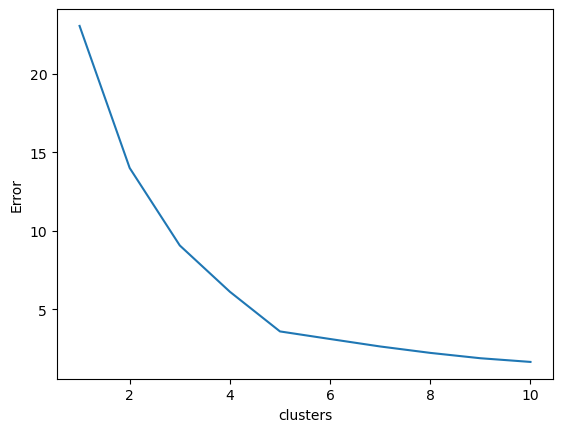

In [117]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [125]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df2= df.copy()
df2["Cluster"] = modelo.labels_

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

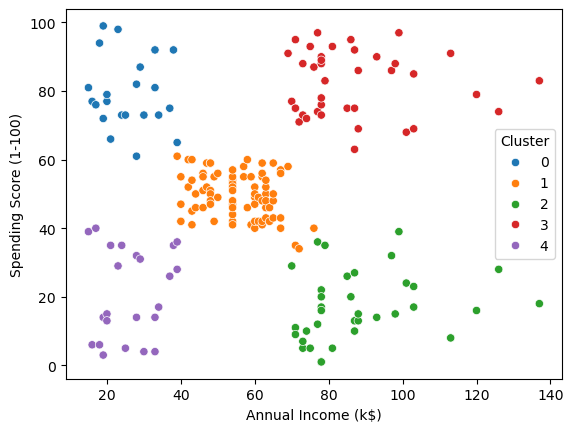

In [78]:
sns.scatterplot(
    data = df2,
    x = 'Annual Income (k$)', 
    y = "Spending Score (1-100)", 
    hue = "Cluster",
    palette = "tab10"
)

In [119]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
silhouette_kmeans = silhouette_score(data, df2["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.5594854531357839


10. Perform clustering with the Age, Annual Income (k$) and Spending Score (1-100) columns
 * Analyze the optimal cluster number with the elbow method
 * Add column with cluster to dataset copy
 * Calculate silhouette

In [120]:
data = df_norm.loc[: , ['Age','Spending Score (1-100)', 'Spending Score (1-100)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [121]:
suma_error

[[1, 41.9959138543112],
 [2, 19.526636024084056],
 [3, 12.890190968259681],
 [4, 8.114436048746526],
 [5, 6.5614261118309924],
 [6, 5.142734353177492],
 [7, 4.257303251338863],
 [8, 3.6355700304643537],
 [9, 3.254346387601513],
 [10, 2.890331112684505]]

<Axes: xlabel='clusters', ylabel='Error'>

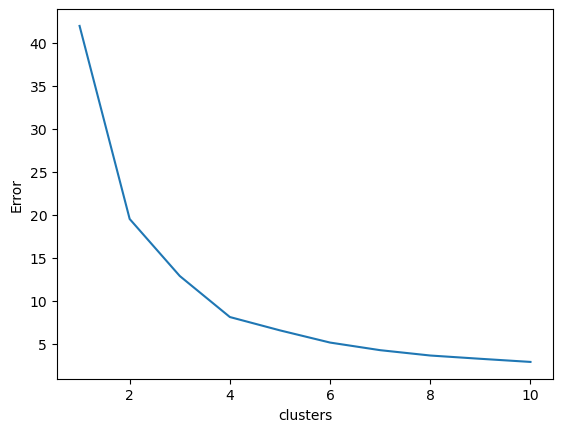

In [122]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [136]:
data = df_norm.loc[: , ['Age','Spending Score (1-100)', 'Spending Score (1-100)']]
modelo = KMeans(
    n_clusters = 4,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df3 = df.copy()
df3["Cluster"] = modelo.labels_

C:\Users\ignac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [137]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
silhouette_kmeans = silhouette_score(data, df3["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.475571709758284


11. Interpret the clusters from the previous point and assign a name to each of the clusters

In [132]:
df3.iloc[:,2:].groupby("Cluster").agg(["max","mean","min"]).round(1)
# 0 = bajo consumo
# 1 = joven de alto consumo
# 2 = adulto de consumo promedio
# 3 = joven de consumo promedio


Age           Annual Income (k$)           Spending Score (1-100)  \
        max  mean min                max  mean min                    max   
Cluster                                                                     
0        67  43.3  19                137  67.0  16                     35   
1        40  30.2  18                137  66.1  15                     99   
2        70  56.0  43                 79  54.4  38                     60   
3        41  27.6  18                 99  53.3  15                     66   

                   
         mean min  
Cluster            
0        15.4   1  
1        82.4  68  
2        48.5  35  
3        49.1  29

In [141]:
# 0 = bajo consumo
# 1 = joven de alto consumo
# 2 = adulto de consumo promedio
# 3 = joven de consumo promedio
df3["Cluster"] = df3["Cluster"].map(
    {
        0: 'bajo consumo',
        1: 'joven de alto consumo',
        2: 'adulto de consumo promedio',
        3: 'joven de consumo promedio',
    }
)

In [142]:
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,adulto de consumo promedio
1,2,Male,21,15,81,bajo consumo
2,3,Female,20,16,6,joven de consumo promedio
3,4,Female,23,16,77,bajo consumo
4,5,Female,31,17,40,adulto de consumo promedio


In [143]:
df3.groupby(["Cluster", "Gender"]).size()

Cluster                     Gender
adulto de consumo promedio  Female    29
                            Male      18
bajo consumo                Female    33
                            Male      24
joven de alto consumo       Female    26
                            Male      21
joven de consumo promedio   Female    24
                            Male      25
dtype: int64

In [128]:
df2.iloc[:,3:].groupby("Cluster").agg(["max","mean","min"]).round(1)

Annual Income (k$)           Spending Score (1-100)          
                       max  mean min                    max  mean min
Cluster                                                              
0                       39  25.7  15                     99  79.4  61
1                      137  88.2  70                     39  17.1   1
2                       76  55.1  39                     61  49.4  34
3                      137  86.5  69                     97  82.1  63
4                       39  25.7  15                     40  20.2   3